In [22]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

from qiskit.visualization import plot_histogram

n = 3

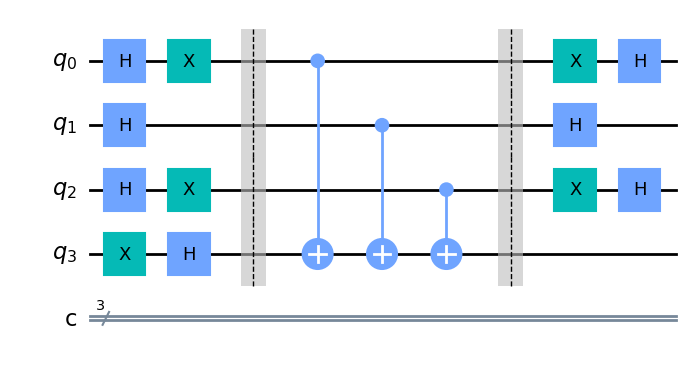

In [23]:
# Draw the circuit

circuit_b = QuantumCircuit(n+1,n)

b_str = '101'

# Hadamard q0, q1, q2
for qubit in range(n):
  circuit_b.h(qubit)
  if (b_str[qubit]=='1'): circuit_b.x(qubit)

circuit_b.x(3) # Place X gate in q3
circuit_b.h(3) # Place hadamard in q3

circuit_b.barrier()

# XNOT gates
for qubit in range(n):
    circuit_b.cx(qubit, n)
    
circuit_b.barrier()

# Hadamard q0, q1, q2
for qubit in range(n):
  if (b_str[qubit]=='1'): circuit_b.x(qubit)
  circuit_b.h(qubit)
    
circuit_b.draw(output='mpl')

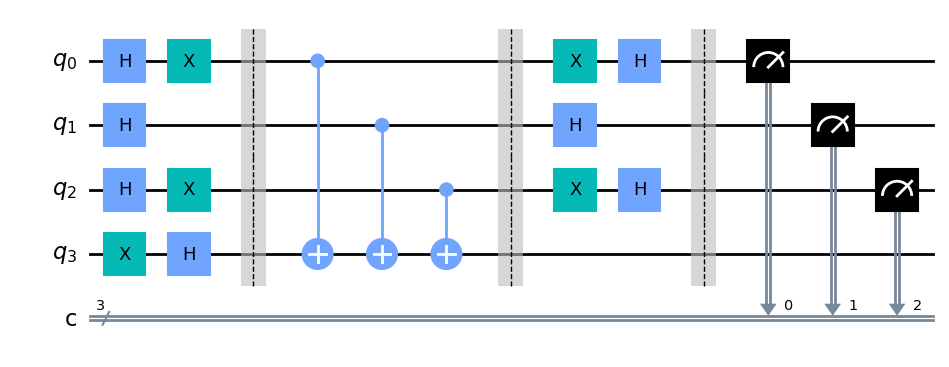

In [24]:
# Measure

circuit_b.barrier()
for i in range(n):
    circuit_b.measure(i,i)
    
circuit_b.draw(output='mpl')

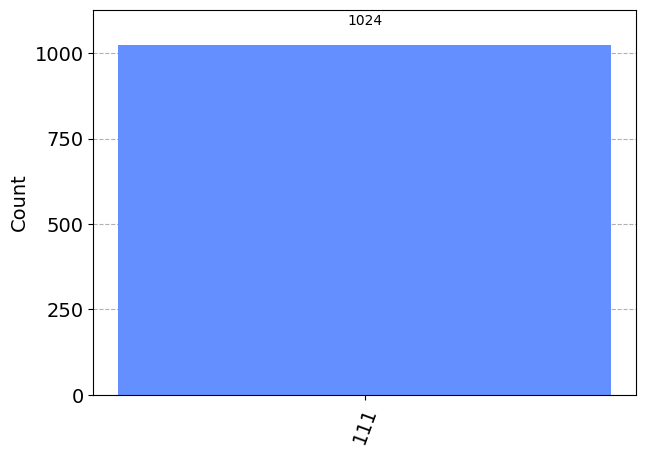

In [21]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit_b, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)